# Lab 2

Start - 4 November 2025.\
Deadline - 23 November 2025, 23:30.

*All solutions must be in a <ins>single Colab Jupyter Notebook file</ins> and uploaded to the <ins>LMS portal</ins> as the link to __your__ completed notebook in Colab.*

In [ ]:
import unittest

import numpy
import pandas
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm
import statsmodels.api as sm
from matplotlib.pyplot import figure
from datetime import date, timedelta
from typing import List, Tuple
from math import exp, log, sqrt
import os
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv
Saving GCurve.csv to GCurve.csv


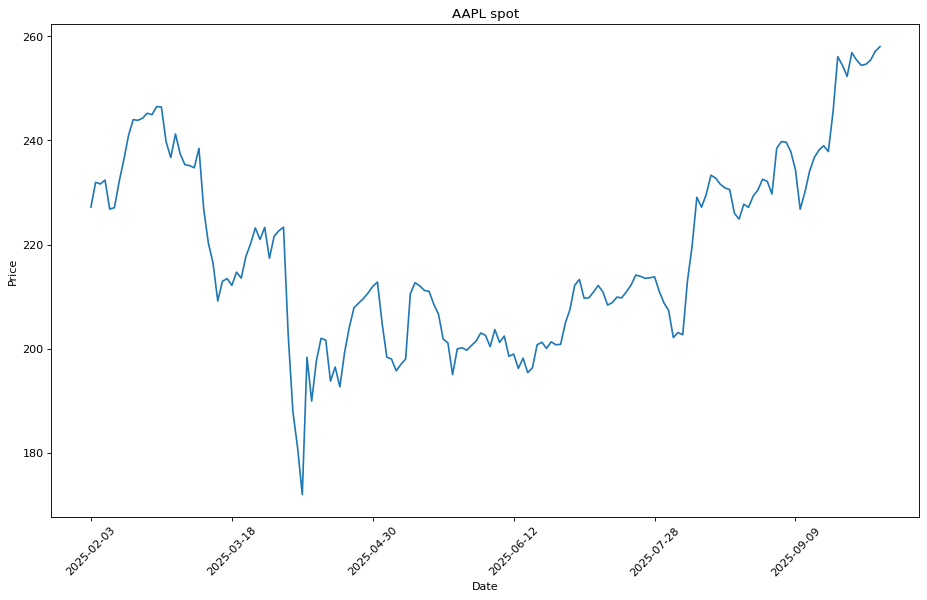

In [ ]:
underlying = "AAPL"

indexValues = pandas.read_csv(io.StringIO(uploaded['AAPL.csv'].decode('utf-8')))
indexDates = indexValues['Date'].to_list()
# indexValues = indexValues.set_index("Date", drop=True)
quotes = indexValues["underlyingPrice"]

figure(figsize=(14, 8), dpi=80)

plt.plot(indexValues["underlyingPrice"])
plt.title(f"{underlying} spot")
plt.xlabel("Date")
plt.ylabel("Price")


step = 30
positions = range(0, len(indexDates), step)
labels = [indexDates[i] for i in positions]

plt.xticks(ticks=positions, labels=labels, rotation=45)
plt.show()

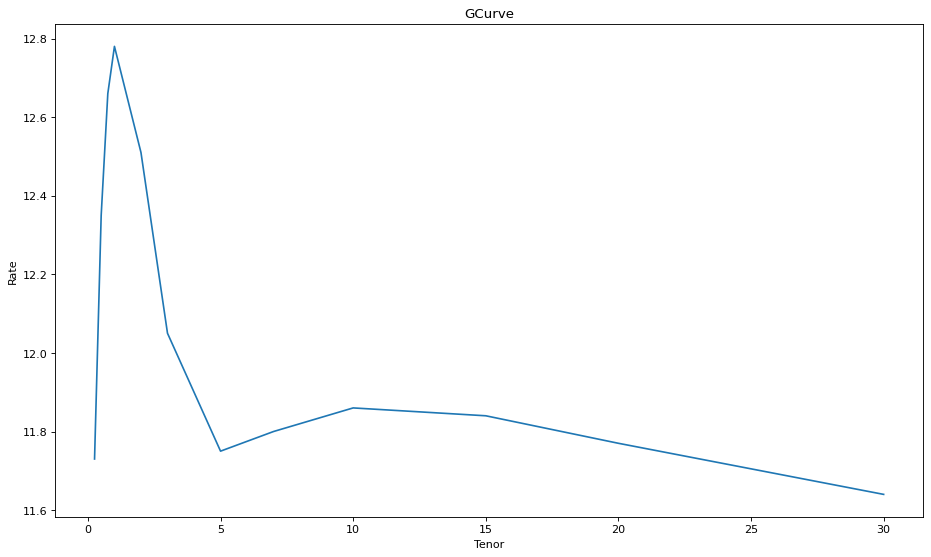

In [ ]:
curveValues = pandas.read_csv(io.StringIO(uploaded['GCurve.csv'].decode('utf-8')))
curveDates = curveValues['date'].to_list()

figure(figsize=(14, 8), dpi=80)

plt.plot(
    curveValues.columns[2:].astype(float),
    curveValues.iloc[0, 2:].astype(float)
)
plt.title("GCurve")
plt.xlabel("Tenor")
plt.ylabel("Rate")

plt.show()

## Geometirc Asian call option

Consider a geometric Asian call option with payoff at maturity $T$ given by:
\begin{equation*}
    \left( \exp\left(\frac{1}{T} \int_0^T \ln S_u \, du\right) - K \right)^+
\end{equation*}
where $K$ is the strike and $S_u$ denotes the price of the underlying asset price at time $u$. Assume the underlying asset price follows the dynamics:
\begin{equation*}
    dS_t = r S_t dt + \sigma(t) S_t d\widetilde{W}_t, \quad S_0 = s_0
\end{equation*}
where
*   $r$ is the constant interest rate;
*   $\sigma(t)$ is a deterministic function of time.

1. (1 point) Define the process:
\begin{equation*}
    Y_t = \int_0^t \ln S_u \, du.
\end{equation*}
Then the option price at time $t$ is given by
\begin{equation*}
    V(t, S_t, Y_t) = e^{-r(T-t)} \mathbb{E}_t \left[ \left( e^{Y_T / T} - K \right)^+ \right].
\end{equation*}
Find the price of this option at arbitrary time $t$ and express this price as a function $V(t, S_t, Y_t)$. \
Ensure your formula reduces to the time 0 pricing formula from the seminar.

2. (2 points) Verify by direct substitution that this price $V(t, s, y)$ for the geometric Asian option satisfies the Feynman-Kac equation
\begin{equation*}
    \frac{\partial V}{\partial t} + r s \frac{\partial V}{\partial s} + \ln s \frac{\partial V}{\partial y} + \frac{1}{2} \sigma^2(t) s^2 \frac{\partial^2 V}{\partial s^2} - r V = 0.
\end{equation*}

3. (2 points) Let $X$ be the financial result of the next hedging strategy:
*   hold position of size $\Delta_t^h$ in the underlying asset at time $t$,
*   borrow needed or lend excessive money at instantaneous rate $r_t^f$ at time $t$. \
Find the decomposition of the hedging error for this option in the Black-Scholes-Merton model with time-dependent volatility and with volatility recalibration.

**Suppose $\sigma(t)$ represent a volatility forecast from the GARCH(1,1) model.**

4. (0.5 point) Implement the valuation of a geometric Asian call option price. \
Consider the interest rate is constant. Assume that the parameters $\alpha$, $\beta$, $\sigma_L$, and the current volatility estimate are known.

In [ ]:
# your code here

5. (0.5 point) Compute the delta and gamma of the geometric Asian option.

In [ ]:
# your code here

Consider the following scenario.\
We sold a geometric Asian call option on AAPL stock with a strike of 190 and expiration date 2025-02-05.\
The trade start date is 2024-02-05.

The conditional standard deviation (instantaneous volatility) $\sigma_{t_k}$ in GARCH(1,1) is given by

\begin{equation*}
\sigma_{t_k}^2 = \gamma\sigma_L^2 + \alpha(\Delta \ln S_{t_k})^2 + \beta\sigma_{t_{k-1}}^2,
\end{equation*}
where
*   $\sigma_L$ is the long-run volatility parameter,
*   $\alpha, \beta, \gamma > 0$ are the weight parameters such that $\alpha + \beta + \gamma = 1$.

Download the provided data table. There is the 6 columns: "Date", "underlyingPrice","alphas", "betas", "longRun", "estimatedVolatility". \
The columns "alphas", "betas", "longRun", and "estimatedVolatility" correspond to the notations in the GARCH(1,1) model, obtained from 1 year of historical data.


6. Implement the calculation of the financial result for a self-financing hedging strategy of a portfolio containing AAPL stock and cash. The number of shares in the strategy equals the option's Delta. Use the volatility obtained in "estimatedVolatility" column for calculations. The instantaneous rate $r_t^f$ is set to $9.5\%$.

In [ ]:
# your code here

7. Plot the time evolution of the financial result.

In [ ]:
# your code here

8. (2 points) Suppose we apply Black-Scholes-Merton model with time-dependend volatility without volitility recalibrartion. \
Assume we calibrate the volatility function in the model using estimates derived from a GARCH(1,1).\
Implement the decomposition of the hedging error into
components (excluding the Vega component). \
Assume that the model rate is $10\%$, and the difference between the model rate and the instantenious rate $r^f_t$ is $0.5\%$. \
Plot the results.\
Explain sign of each component and factors affecting its size.

In [ ]:
# your code here

9. (2 points) Suggest which **calibration variables** can be used for a geometric Asian option in the Black-Scholes-Merton model with time-dependent volatility (estimated from GARCH(1,1)) and volatility recalibration. Provide the corresponding decomposition of the hedging error.

## Forward rates

(2 points) Consider the Hull-White model for simulating the instantaneous rate. \
In the lecture, we derived the dynamics for the forward rate $F(t, S_1, S_2)$ under the risk-neutral measure. \
Consider the yield curve for $t=2022-02-16$ from the "GCurve.csv" file. \
Estimate the parameter $\kappa$ using the following calculated forward rates:
* $F(t, t+0.25, t+0.5)$,
* $F(t, t+0.5, t+0.75)$,
* $F(t, t+0.75, t+1)$,
* $F(t, t+1, t+1.25)$,
* $F(t, t+1.5, t+1.75)$,
* $F(t, t+2, t+2.25)$,
* $F(t, t+3, t+3.25)$,
* $F(t, t+5, t+5.25)$,
* $F(t, t+10, t+10.25)$,
* $F(t, t+15, t+15.25)$,
* $F(t, t+25, t+25.25)$.

Use linear interpolation between the points on the curve, apply the Russian holiday calendar, and use Actual365 as the day count convention. The analysis also assumes simple interest rate.

In [ ]:
# your code here